In [2]:
# 必要なパッケージのインストール
!pip install nltk
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import nltk
import numpy as np
import pandas as pd

In [4]:
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
# bag of words
def bow_vectorizer(docs):
  word2id = {}
  for doc in docs:
    for w in doc:
      if w not in word2id:
        word2id[w] = len(word2id)
        
  result_list = []
  for doc in docs:
    doc_vec = [0] * len(word2id)
    for w in doc:
      doc_vec[word2id[w]] += 1
    result_list.append(doc_vec)
  return result_list, word2id

In [6]:
# tf-idf
def tfidf_vectorizer(docs):
  def tf(word2id, doc):
    term_counts = np.zeros(len(word2id))
    for term in word2id.keys():
      term_counts[word2id[term]] = doc.count(term)
    tf_values = list(map(lambda x: x/sum(term_counts), term_counts))
    return tf_values
  
  def idf(word2id, docs):
    idf = np.zeros(len(word2id))
    for term in word2id.keys():
      idf[word2id[term]] = np.log(len(docs) / sum([bool(term in doc) for doc in docs]))
    return idf
  
  word2id = {}
  for doc in docs:
    for w in doc:
      if w not in word2id:
        word2id[w] = len(word2id)
  
  return [[_tf*_idf for _tf, _idf in zip(tf(word2id, doc), idf(word2id, docs))] for doc in docs], word2id

In [7]:
# 不要なタグや記号などの削除
import re
def cleaning_text(text):
    pattern1 = '-*' # ハイフンの削除
    text = re.sub(pattern1, '', text)
    pattern2 = '`*' # クォーテーションの削除
    text = re.sub(pattern2, '', text)
    pattern2 = "'*" # クォーテーションの削除
    text = re.sub(pattern2, '', text)
    pattern3 = '\(.*?\)' # かっこ内の削除
    text = re.sub(pattern3, '', text)
    return text

In [8]:
# スペースで区切る
def tokenize_text(text):
  text = re.sub('[.,]', '', text)
  return text.split()

In [9]:
def remove_latter(text):
  pattern = '/.*'
  text = re.sub(pattern, '', text)
  return text

In [10]:
#lemmatizeを行う
from nltk.corpus import wordnet as wn

def lemmatize_word(word):
    # make words lower  example: Python =>python
    word=word.lower()
    
    # lemmatize  example: cooked=>cook
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
      return lemma

In [11]:
# ストップワードの削除
en_stop = nltk.corpus.stopwords.words('english')

def remove_stopwords(word, stopwordset):
  if word in stopwordset:
    return None
  else:
    return word

In [12]:
# テキストの前処理
def preprocessing_text(text):
  text = cleaning_text(text)
  tokens = tokenize_text(text)
  tokens = [remove_latter(word) for word in tokens]
  tokens = [lemmatize_word(word) for word in tokens]
  tokens = [remove_stopwords(word, en_stop) for word in tokens]
  tokens = [word for word in tokens if word is not None]
  tokens = [word for word in tokens if word != '']
  tokens = [word for word in tokens if word != '?']
  return tokens

In [13]:
nltk.download("brown")
from nltk.corpus import brown

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [17]:
import numpy
def make_docs_vector():
  fileid = brown.fileids()
  result = [preprocessing_text(brown.raw(fileid[i])) for i in range(len(fileid))]
  res, _ = bow_vectorizer(result)
  docs_vector = numpy.array(res)
  print(docs_vector)
  return docs_vector


In [25]:
from sklearn import cluster, decomposition
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
def clustering(docs_vector, n_clusters):
  model = cluster.KMeans(n_clusters=n_clusters)
  model.fit(docs_vector)
  print(model.labels_)
  pca_model = decomposition.PCA(n_components=2)
  pca_model.fit(docs_vector)
  compressed = pca_model.transform(docs_vector)
  for i, c in enumerate(list(plt.cm.get_cmap('tab20').colors)[:n_clusters]):
    plt.scatter(compressed[model.labels_==i,0],compressed[model.labels_==i,1],color=c)


In [19]:
docs_vector = make_docs_vector()

[[14 17  4 ...  0  0  0]
 [ 0  8  0 ...  0  0  0]
 [ 0  2  3 ...  0  0  0]
 ...
 [ 0  0  1 ...  0  0  0]
 [ 0  0  1 ...  0  0  0]
 [ 0  1  0 ...  1  1  1]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[ 4  4  4  4  4  4  4  4  4  4  4  4  0  4  4  4  4  4  4  0  4  4  9  4
  4  4  4  4  3  4  3  9  4  0  3  3  4  0  4  4  9  0  3  3  4  4  0  4
  4  4  3  0  4  3  4  4  3  4  3  3  3  3  3  3  3  0  3  9  9  3  3  3
  3  9  0  3  3  0  0  0  9  0  3  3  9  3  9  3  3  3  3  9  0  3  9  9
  3  3  3  3  9  0  0  9  9  9  3  3  3  4  3  3  3  9  9  0  9 13  9  9
  3  3  0  3  3  3  9  9  3  3  0  3  3  3  3  3  3  3  3  3  3  3  6  0
  3  0  8  3  3  6  4  3  3  3  0  3  0  5  0  3  6  9  6  9  0  3  6  9
  4  4  4  6  9  3  3  6  6  3  6  9  0 13  3  9  9  5  4  4  3  3  3  3
  6  9  0  4  9  3  4  3  3  3  9  9  3  4  0  9  3  0  3  3  0  3  3  0
  3  3  3  6  6  0  0  9  6  6  3  0  6  6  9  3  3  4  3  0  0  0  0  6
  0  6  6  0  3  3  0  0  6  0  6  3  0  0  6  6  0  3  3  9  3  9  9  6
 11  3  3  4  4  4  4  4  9  9  3  9  4  1 10  9  0  3  3  3  3  3 14  3
  9  0  3  3  3  3  3  0  0  2  3  0  3  0  0  3  9  3  3  3  0  0  3  2
  3  7  7  3  9  3  3  0  0  0  0  0  9 12  3  3  9

<ipython-input-25-4f05031b879e>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  for i, c in enumerate(list(plt.cm.get_cmap('tab20').colors)[:n_clusters]):


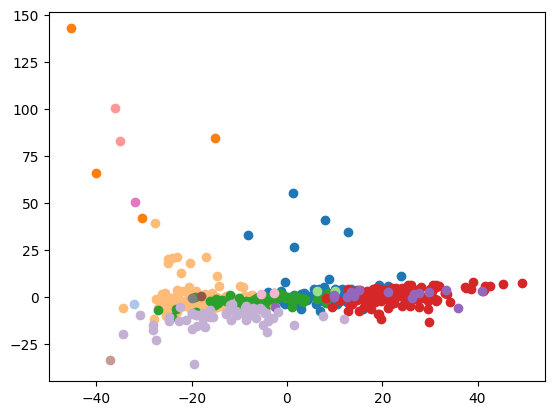

In [26]:
clustering(docs_vector, 15)